<a href="https://colab.research.google.com/github/shaharshsah/CodeVita-2018/blob/main/Bill_Date_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')
#to mount the data in the drive 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Smaple/H2HBABBA2961.csv')
df.info()
# to read the data from the drive and read it in the data frame named 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [77]:
df['document_create_date']=pd.to_datetime(df['document_create_date'],format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'],format='%Y%m%d')
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'],format='%Y%m%d')
df['due_in_date']=pd.to_datetime(df['due_in_date'],format='%Y%m%d')
df.head()

# to convert the date in the dateTime format

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200790710,F co,2019-08-26 00:00:00,2019.0,1.929708e+09,2019-08-07,2019-08-06,2019-08-07,2019-08-22,USD,RV,1.0,NaN,13788.55,2019-08-07,NAA8,1.929708e+09,0
1,U001,0200744019,TARG associates,2019-10-25 00:00:00,2019.0,1.929976e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,1.0,NaN,3500.58,2019-10-08,NAA8,1.929976e+09,0
2,U001,0200803720,DEC corp,NaN,2020.0,1.930614e+09,2020-03-07,2020-03-07,2020-03-07,2020-03-24,USD,RV,1.0,NaN,2301.23,2020-03-01,NAM4,1.930614e+09,1
3,U001,0100031704,DELHAIZE llc,2019-12-31 00:00:00,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,1.0,NaN,45725.58,2019-12-09,NAA8,1.930254e+09,0
4,U001,0200148860,DOLLA foundation,2019-07-18 00:00:00,2019.0,1.929571e+09,2019-07-03,2019-07-03,2019-07-03,2019-07-18,USD,RV,1.0,NaN,107893.87,2019-07-03,NAA8,1.929571e+09,0


In [78]:
df.nunique()
# to check all the unique coloumn in the dataFrame

business_code                 6
cust_number                1404
name_customer              4212
clear_date                  394
buisness_year                 2
doc_id                    48813
posting_date                502
document_create_date        504
document_create_date.1      502
due_in_date                 548
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44277
baseline_create_date        506
cust_payment_terms           75
invoice_id                48805
isOpen                        2
dtype: int64

In [79]:
df.drop(['posting_id','name_customer','area_business'],axis=1,inplace=True)
df.head()
# dorpping few column which show similar correleation

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200790710,2019-08-26 00:00:00,2019.0,1.929708e+09,2019-08-07,2019-08-06,2019-08-07,2019-08-22,USD,RV,13788.55,2019-08-07,NAA8,1.929708e+09,0
1,U001,0200744019,2019-10-25 00:00:00,2019.0,1.929976e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,3500.58,2019-10-08,NAA8,1.929976e+09,0
2,U001,0200803720,NaN,2020.0,1.930614e+09,2020-03-07,2020-03-07,2020-03-07,2020-03-24,USD,RV,2301.23,2020-03-01,NAM4,1.930614e+09,1
3,U001,0100031704,2019-12-31 00:00:00,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,45725.58,2019-12-09,NAA8,1.930254e+09,0
4,U001,0200148860,2019-07-18 00:00:00,2019.0,1.929571e+09,2019-07-03,2019-07-03,2019-07-03,2019-07-18,USD,RV,107893.87,2019-07-03,NAA8,1.929571e+09,0


# **Data Preprocessing**

In [80]:
train_df=df[df.clear_date.isnull()]
test_df = df[df.clear_date.isnull()==False]
# converting the "df" dataFrame into test and train based on the clear_date values
# if clear_date row has no null values we take it in train dataframe for me it is "test_df" 
# if clear_date row has null values we take it in train dataframe for me it is "train_df"

test_df.dropna(how='any',axis=0,inplace=True)
test_df.reset_index(drop=True,inplace=True)
# drop all the rows from the test_df that is the training set which has null values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [81]:
test_df.head()

,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200790710,2019-08-26 00:00:00,2019.0,1.929708e+09,2019-08-07,2019-08-06,2019-08-07,2019-08-22,USD,RV,13788.55,2019-08-07,NAA8,1.929708e+09,0
1,U001,0200744019,2019-10-25 00:00:00,2019.0,1.929976e+09,2019-10-08,2019-10-07,2019-10-08,2019-10-23,USD,RV,3500.58,2019-10-08,NAA8,1.929976e+09,0
2,U001,0100031704,2019-12-31 00:00:00,2019.0,1.930254e+09,2019-12-09,2019-12-09,2019-12-09,2019-12-24,USD,RV,45725.58,2019-12-09,NAA8,1.930254e+09,0
3,U001,0200148860,2019-07-18 00:00:00,2019.0,1.929571e+09,2019-07-03,2019-07-03,2019-07-03,2019-07-18,USD,RV,107893.87,2019-07-03,NAA8,1.929571e+09,0
4,U001,0200762301,2019-06-24 00:00:00,2019.0,1.929444e+09,2019-06-07,2019-06-06,2019-06-07,2019-06-22,USD,RV,5692.25,2019-06-07,NAC6,1.929444e+09,0


In [82]:

test_df.drop(['document_create_date','document_create_date.1'],axis=1,inplace=True)
test_df['clear_date'] = pd.to_datetime(test_df['clear_date'])
test_df.head()
#dropped the unecessary coloumns and removing the timestrap from the dataFrame

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200790710,2019-08-26,2019.0,1.929708e+09,2019-08-07,2019-08-22,USD,RV,13788.55,2019-08-07,NAA8,1.929708e+09,0
1,U001,0200744019,2019-10-25,2019.0,1.929976e+09,2019-10-08,2019-10-23,USD,RV,3500.58,2019-10-08,NAA8,1.929976e+09,0
2,U001,0100031704,2019-12-31,2019.0,1.930254e+09,2019-12-09,2019-12-24,USD,RV,45725.58,2019-12-09,NAA8,1.930254e+09,0
3,U001,0200148860,2019-07-18,2019.0,1.929571e+09,2019-07-03,2019-07-18,USD,RV,107893.87,2019-07-03,NAA8,1.929571e+09,0
4,U001,0200762301,2019-06-24,2019.0,1.929444e+09,2019-06-07,2019-06-22,USD,RV,5692.25,2019-06-07,NAC6,1.929444e+09,0


In [83]:
test_df['Difference'] = (test_df['clear_date']-test_df['due_in_date']).dt.days
test_df.head() 
#took the difference of the dates and convert into intger type  
#df_test['Difference'] = (df_test['First_Date'] - df_test['Second Date']).dt.days
# for me the difference coumn is my target column



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,business_code,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Difference
0,U001,0200790710,2019-08-26,2019.0,1.929708e+09,2019-08-07,2019-08-22,USD,RV,13788.55,2019-08-07,NAA8,1.929708e+09,0,4
1,U001,0200744019,2019-10-25,2019.0,1.929976e+09,2019-10-08,2019-10-23,USD,RV,3500.58,2019-10-08,NAA8,1.929976e+09,0,2
2,U001,0100031704,2019-12-31,2019.0,1.930254e+09,2019-12-09,2019-12-24,USD,RV,45725.58,2019-12-09,NAA8,1.930254e+09,0,7
3,U001,0200148860,2019-07-18,2019.0,1.929571e+09,2019-07-03,2019-07-18,USD,RV,107893.87,2019-07-03,NAA8,1.929571e+09,0,0
4,U001,0200762301,2019-06-24,2019.0,1.929444e+09,2019-06-07,2019-06-22,USD,RV,5692.25,2019-06-07,NAC6,1.929444e+09,0,2


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 1080x864 with 0 Axes>

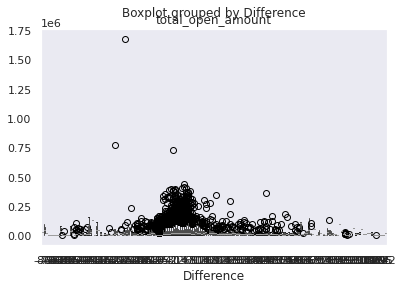

In [84]:
import matplotlib.pyplot as plt 
% matplotlib inline
plt.figure(figsize=(15,12))
test_df.boxplot(by ='Difference', column =['total_open_amount'], grid = False)
#done the visualisation of total open amount

In [85]:
upper_lim = test_df['total_open_amount'].quantile(.95)
lower_lim = test_df['total_open_amount'].quantile(.05)

test_df = test_df[(test_df['total_open_amount'] < upper_lim) & (test_df['total_open_amount'] > lower_lim)]
test_df.head()
test_df.describe()

#performed the percentile method for handling outliers on total_open_amount


,buisness_year,doc_id,total_open_amount,invoice_id,isOpen,Difference
count,35992.000000,3.599200e+04,35992.000000,3.599200e+04,35992.0,35992.000000
mean,2019.134224,2.003306e+09,26908.028403,2.003306e+09,0.0,0.856996
std,0.340898,2.636791e+08,26421.070191,2.636791e+08,0.0,10.434421
min,2019.000000,1.928499e+09,334.120000,1.928499e+09,0.0,-86.000000
25%,2019.000000,1.929180e+09,5657.020000,1.929180e+09,0.0,-3.000000
50%,2019.000000,1.929726e+09,17174.540000,1.929726e+09,0.0,0.000000
75%,2019.000000,1.930200e+09,42061.250000,1.930200e+09,0.0,2.000000
max,2020.000000,2.960618e+09,109880.720000,2.960618e+09,0.0,242.000000


In [86]:
encoded_columns = pd.get_dummies(test_df['business_code'])
test_df = test_df.join(encoded_columns).drop('business_code', axis=1)
test_df.head(20)
# on hot encoding encoding of business_code column it create "CA02	U001	U002	U005	U007	U013"

,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Difference,CA02,U001,U002,U005,U007,U013
0,0200790710,2019-08-26,2019.0,1.929708e+09,2019-08-07,2019-08-22,USD,RV,13788.55,2019-08-07,NAA8,1.929708e+09,0,4,0,1,0,0,0,0
1,0200744019,2019-10-25,2019.0,1.929976e+09,2019-10-08,2019-10-23,USD,RV,3500.58,2019-10-08,NAA8,1.929976e+09,0,2,0,1,0,0,0,0
2,0100031704,2019-12-31,2019.0,1.930254e+09,2019-12-09,2019-12-24,USD,RV,45725.58,2019-12-09,NAA8,1.930254e+09,0,7,0,1,0,0,0,0
3,0200148860,2019-07-18,2019.0,1.929571e+09,2019-07-03,2019-07-18,USD,RV,107893.87,2019-07-03,NAA8,1.929571e+09,0,0,0,1,0,0,0,0
4,0200762301,2019-06-24,2019.0,1.929444e+09,2019-06-07,2019-06-22,USD,RV,5692.25,2019-06-07,NAC6,1.929444e+09,0,2,0,1,0,0,0,0
5,0200769623,2019-10-01,2019.0,1.929901e+09,2019-09-21,2019-10-06,USD,RV,44416.67,2019-09-21,NAH4,1.929901e+09,0,-5,0,1,0,0,0,0
6,0200592182,2019-04-16,2019.0,1.929137e+09,2019-04-12,2019-04-24,USD,RV,4986.00,2019-04-01,NAM4,1.929137e+09,0,-8,0,1,0,0,0,0
7,0200756072,2019-11-27,2019.0,1.930143e+09,2019-11-12,2019-11-27,USD,RV,28384.29,2019-11-12,NAA8,1.930143e+09,0,0,0,1,0,0,0,0
8,0200794332,2019-07-12,2019.0,1.929536e+09,2019-06-26,2019-07-11,USD,RV,30098.04,2019-06-26,NAAX,1.929536e+09,0,1,0,1,0,0,0,0
9,0140105785,2019-12-09,2019.0,2.960593e+09,2019-11-14,2019-12-03,CAD,RV,51425.52,2019-11-23,CA10,2.960593e+09,0,6,1,0,0,0,0,0


In [87]:
for i in test_df.index:
    if test_df['invoice_currency'][i]=='CAD':
     test_df['total_open_amount'][i]=test_df['total_open_amount'][i]*0.7
test_df.head(20)

#to convert all CAD to USD

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,cust_number,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Difference,CA02,U001,U002,U005,U007,U013
0,0200790710,2019-08-26,2019.0,1.929708e+09,2019-08-07,2019-08-22,USD,RV,13788.550,2019-08-07,NAA8,1.929708e+09,0,4,0,1,0,0,0,0
1,0200744019,2019-10-25,2019.0,1.929976e+09,2019-10-08,2019-10-23,USD,RV,3500.580,2019-10-08,NAA8,1.929976e+09,0,2,0,1,0,0,0,0
2,0100031704,2019-12-31,2019.0,1.930254e+09,2019-12-09,2019-12-24,USD,RV,45725.580,2019-12-09,NAA8,1.930254e+09,0,7,0,1,0,0,0,0
3,0200148860,2019-07-18,2019.0,1.929571e+09,2019-07-03,2019-07-18,USD,RV,107893.870,2019-07-03,NAA8,1.929571e+09,0,0,0,1,0,0,0,0
4,0200762301,2019-06-24,2019.0,1.929444e+09,2019-06-07,2019-06-22,USD,RV,5692.250,2019-06-07,NAC6,1.929444e+09,0,2,0,1,0,0,0,0
5,0200769623,2019-10-01,2019.0,1.929901e+09,2019-09-21,2019-10-06,USD,RV,44416.670,2019-09-21,NAH4,1.929901e+09,0,-5,0,1,0,0,0,0
6,0200592182,2019-04-16,2019.0,1.929137e+09,2019-04-12,2019-04-24,USD,RV,4986.000,2019-04-01,NAM4,1.929137e+09,0,-8,0,1,0,0,0,0
7,0200756072,2019-11-27,2019.0,1.930143e+09,2019-11-12,2019-11-27,USD,RV,28384.290,2019-11-12,NAA8,1.930143e+09,0,0,0,1,0,0,0,0
8,0200794332,2019-07-12,2019.0,1.929536e+09,2019-06-26,2019-07-11,USD,RV,30098.040,2019-06-26,NAAX,1.929536e+09,0,1,0,1,0,0,0,0
9,0140105785,2019-12-09,2019.0,2.960593e+09,2019-11-14,2019-12-03,CAD,RV,35997.864,2019-11-23,CA10,2.960593e+09,0,6,1,0,0,0,0,0


In [88]:
test_df.drop(['doc_id','isOpen'],axis=1,inplace=True)
test_df.describe()
# dropped the doc_id and isOpen column

,buisness_year,total_open_amount,invoice_id,Difference,CA02,U001,U002,U005,U007,U013
count,35992.000000,35992.000000,3.599200e+04,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000
mean,2019.134224,26253.589359,2.003306e+09,0.856996,0.070460,0.912008,0.003223,0.000389,0.000056,0.013864
std,0.340898,25837.404635,2.636791e+08,10.434421,0.255924,0.283287,0.056680,0.019719,0.007454,0.116929
min,2019.000000,235.690000,1.928499e+09,-86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,5466.577500,1.929180e+09,-3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,16849.255000,1.929726e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,41159.460000,1.930200e+09,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,109880.720000,2.960618e+09,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


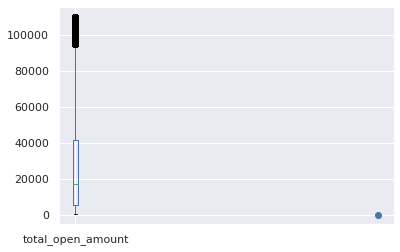

In [89]:
test_df['total_open_amount'].plot.box()
plt.scatter(10,12)
plt.show()

In [90]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
test_df['cust_number']= label_encoder.fit_transform(test_df['cust_number'])
label_encoder = preprocessing.LabelEncoder()

test_df['cust_payment_terms']= label_encoder.fit_transform(test_df['cust_payment_terms'])
#test_df.drop(['buisness_year'],axis=1,inplace=True)

encoded_columns = pd.get_dummies(test_df['invoice_currency'])
test_df = test_df.join(encoded_columns).drop('invoice_currency', axis=1)


test_df.head(10)
#label encoding of cust_number, invoice_currency and cust_payments_terms

,cust_number,clear_date,buisness_year,posting_date,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Difference,CA02,U001,U002,U005,U007,U013,CAD,USD
0,878,2019-08-26,2019.0,2019-08-07,2019-08-22,RV,13788.550,2019-08-07,19,1.929708e+09,4,0,1,0,0,0,0,0,1
1,768,2019-10-25,2019.0,2019-10-08,2019-10-23,RV,3500.580,2019-10-08,19,1.929976e+09,2,0,1,0,0,0,0,0,1
2,111,2019-12-31,2019.0,2019-12-09,2019-12-24,RV,45725.580,2019-12-09,19,1.930254e+09,7,0,1,0,0,0,0,0,1
3,478,2019-07-18,2019.0,2019-07-03,2019-07-18,RV,107893.870,2019-07-03,19,1.929571e+09,0,0,1,0,0,0,0,0,1
4,805,2019-06-24,2019.0,2019-06-07,2019-06-22,RV,5692.250,2019-06-07,25,1.929444e+09,2,0,1,0,0,0,0,0,1
5,822,2019-10-01,2019.0,2019-09-21,2019-10-06,RV,44416.670,2019-09-21,34,1.929901e+09,-5,0,1,0,0,0,0,0,1
6,633,2019-04-16,2019.0,2019-04-12,2019-04-24,RV,4986.000,2019-04-01,37,1.929137e+09,-8,0,1,0,0,0,0,0,1
7,792,2019-11-27,2019.0,2019-11-12,2019-11-27,RV,28384.290,2019-11-12,19,1.930143e+09,0,0,1,0,0,0,0,0,1
8,895,2019-07-12,2019.0,2019-06-26,2019-07-11,RV,30098.040,2019-06-26,21,1.929536e+09,1,0,1,0,0,0,0,0,1
9,382,2019-12-09,2019.0,2019-11-14,2019-12-03,RV,35997.864,2019-11-23,6,2.960593e+09,6,1,0,0,0,0,0,1,0


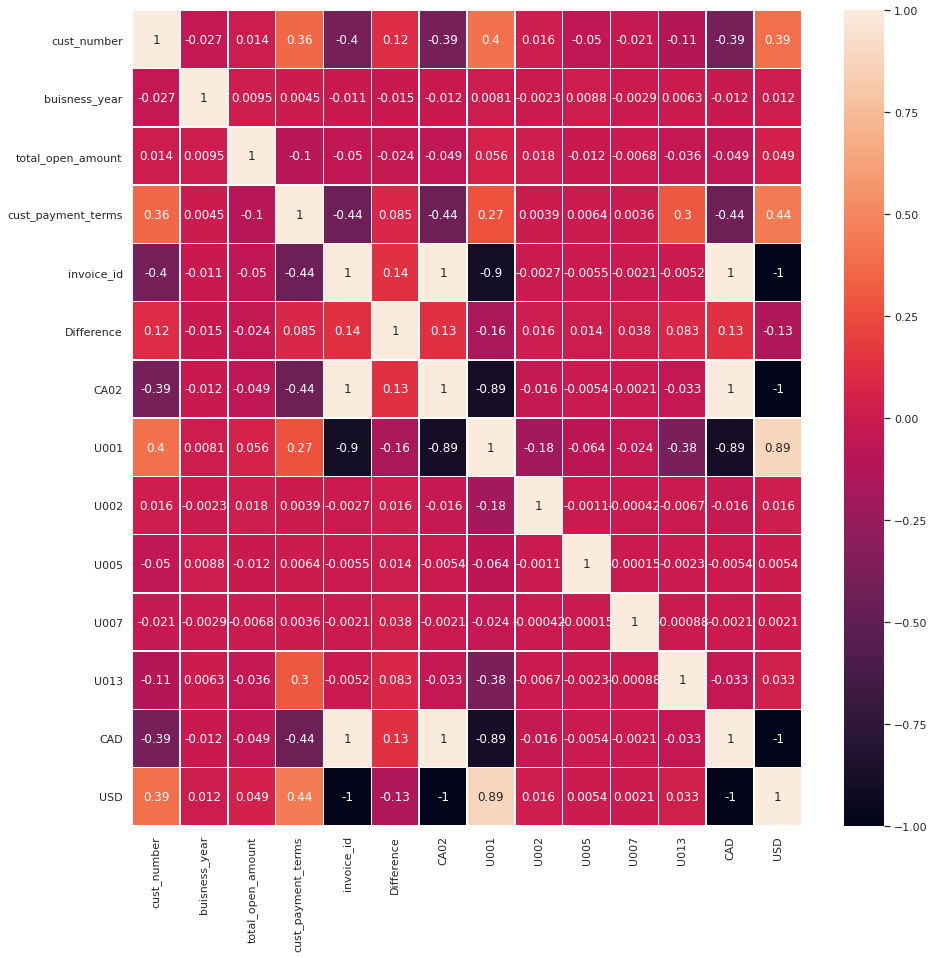

In [91]:
import seaborn as sns;sns.set_theme()
plt.figure(figsize=(15,15))
sns.heatmap(test_df.corr(),annot=True,linewidths=.5)
# plotted the heatmap which shows the correleation with all the features

In [92]:
for i in test_df.index:
    if test_df['total_open_amount'][i]>=70000.00:
     test_df['total_open_amount'][i]=52061.250000
    if test_df['total_open_amount'][i]<=2000.00:
     test_df['total_open_amount'][i]=26421.070191

test_df.describe()
# setting the lower and the upper values for the total_open _amount


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,cust_number,buisness_year,total_open_amount,cust_payment_terms,invoice_id,Difference,CA02,U001,U002,U005,U007,U013,CAD,USD
count,35992.00000,35992.000000,35992.000000,35992.000000,3.599200e+04,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000,35992.000000
mean,760.72994,2019.134224,26819.576365,26.099189,2.003306e+09,0.856996,0.070460,0.912008,0.003223,0.000389,0.000056,0.013864,0.070460,0.929540
std,245.17999,0.340898,17989.658951,12.115416,2.636791e+08,10.434421,0.255924,0.283287,0.056680,0.019719,0.007454,0.116929,0.255924,0.255924
min,0.00000,2019.000000,2000.280000,0.000000,1.928499e+09,-86.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,681.00000,2019.000000,12110.570000,19.000000,1.929180e+09,-3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,822.00000,2019.000000,26421.070191,21.000000,1.929726e+09,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,838.00000,2019.000000,41159.460000,34.000000,1.930200e+09,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1301.00000,2020.000000,69986.680000,69.000000,2.960618e+09,242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline



In [94]:
test_df.drop(['U002','U002','U005','U007'],axis=1,inplace=True)
#after performing the feature analysis on the dataframe, dropped few column which shows the lowest correleation


In [95]:
test_df.sort_values(by=['baseline_create_date'])
# sorting the values on the basis of the baseline_create_date

,cust_number,clear_date,buisness_year,posting_date,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,Difference,CA02,U001,U013,CAD,USD
3594,354,2019-02-20,2019.0,2019-01-11,2019-01-06,RV,26421.070191,2018-12-27,6,2.960522e+09,45,1,0,0,1,0
12863,579,2019-02-19,2019.0,2019-01-15,2019-01-27,RV,3245.720000,2018-12-28,30,1.928625e+09,23,0,1,0,0,1
2894,799,2019-01-22,2019.0,2018-12-30,2019-01-14,RV,14380.160000,2018-12-30,34,1.928540e+09,8,0,1,0,0,1
3723,768,2019-01-18,2019.0,2018-12-30,2019-01-14,RV,26421.070191,2018-12-30,19,1.928533e+09,4,0,1,0,0,1
771,822,2019-01-09,2019.0,2018-12-30,2019-01-14,RV,8885.570000,2018-12-30,34,1.928538e+09,-5,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,342,2020-03-23,2020.0,2020-02-23,2020-03-13,RV,35929.684000,2020-03-03,6,2.960615e+09,10,1,0,0,1,0
12832,409,2020-03-18,2020.0,2020-02-25,2020-03-14,RV,8696.093000,2020-03-04,6,2.960616e+09,4,1,0,0,1,0
10086,352,2020-03-13,2020.0,2020-02-26,2020-03-16,RV,17557.687000,2020-03-06,6,2.960617e+09,-3,1,0,0,1,0
29019,401,2020-03-16,2020.0,2020-02-26,2020-03-16,RV,52803.394000,2020-03-06,6,2.960616e+09,0,1,0,0,1,0


## **data** **splitting**

In [96]:
X=test_df.drop(['Difference'],axis=1)
y=test_df['Difference']
X.info()
# assign the values for the X nad y parameter


<class 'pandas.core.frame.DataFrame'>
Int64Index: 35992 entries, 0 to 39990
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           35992 non-null  int64         
 1   clear_date            35992 non-null  datetime64[ns]
 2   buisness_year         35992 non-null  float64       
 3   posting_date          35992 non-null  object        
 4   due_in_date           35992 non-null  datetime64[ns]
 5   document type         35992 non-null  object        
 6   total_open_amount     35992 non-null  float64       
 7   baseline_create_date  35992 non-null  datetime64[ns]
 8   cust_payment_terms    35992 non-null  int64         
 9   invoice_id            35992 non-null  float64       
 10  CA02                  35992 non-null  uint8         
 11  U001                  35992 non-null  uint8         
 12  U013                  35992 non-null  uint8         
 13  CAD             

In [97]:
X_train, X_inter_test, y_train, y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)
X_val, X_test, y_val, y_test=train_test_split(X_inter_test,y_inter_test,test_size=0.3,random_state=0 , shuffle = False)
X_train.shape, X_test.shape,X_val.shape

((25194, 15), (3240, 15), (7558, 15))

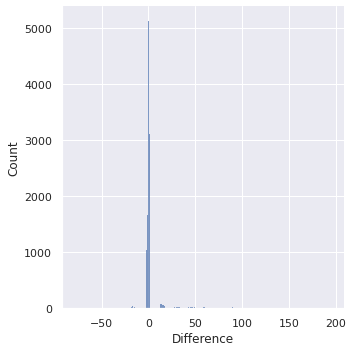

In [98]:
sns.displot(y_train)
# data visualisation

In [99]:
X_train.info()

#['cust_number', 'total_open_amount', 'cust_payment_terms','invoice_id','CA02','U001','U013','CAD','USD']
#[0,2,3,4,5,7,8]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25194 entries, 0 to 27982
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   cust_number           25194 non-null  int64         
 1   clear_date            25194 non-null  datetime64[ns]
 2   buisness_year         25194 non-null  float64       
 3   posting_date          25194 non-null  object        
 4   due_in_date           25194 non-null  datetime64[ns]
 5   document type         25194 non-null  object        
 6   total_open_amount     25194 non-null  float64       
 7   baseline_create_date  25194 non-null  datetime64[ns]
 8   cust_payment_terms    25194 non-null  int64         
 9   invoice_id            25194 non-null  float64       
 10  CA02                  25194 non-null  uint8         
 11  U001                  25194 non-null  uint8         
 12  U013                  25194 non-null  uint8         
 13  CAD             

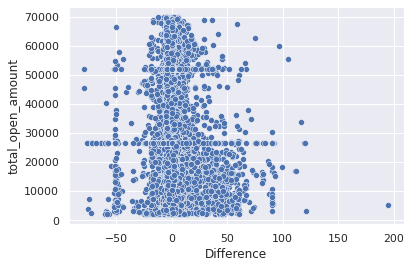

In [100]:
sns.scatterplot(data= X_train.merge(y_train,on=X_train.index),x='Difference',y='total_open_amount')
# it shows the major concentration od the data

In [101]:
X_train.drop(['document type'],inplace=True,axis=1)
X_val.drop(['document type'],inplace=True,axis=1)
X_test.drop(['document type'],inplace=True,axis=1)

X_train.drop(['posting_date','due_in_date'],inplace=True,axis=1)
X_val.drop(['posting_date','due_in_date'],inplace=True,axis=1)
X_test.drop(['posting_date','due_in_date'],inplace=True,axis=1)

# dropped few column from all the three dataframe




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [102]:

X_train['day_of_week_bs'] = X_train['baseline_create_date'].dt.weekday 
X_val['day_of_week_bs'] = X_val['baseline_create_date'].dt.weekday 
X_test['day_of_week_bs'] = X_test['baseline_create_date'].dt.weekday

X_train['day_of_Journey_bs'] = X_train['baseline_create_date'].dt.day
X_train['month_of_Journey_bs'] = X_train['baseline_create_date'].dt.month
X_train['year_of_Journey_bs'] = X_train['baseline_create_date'].dt.year

X_val['day_of_Journey_bs'] = X_val['baseline_create_date'].dt.day
X_val['month_of_Journey_bs'] = X_val['baseline_create_date'].dt.month
X_val['year_of_Journey_bs'] = X_val['baseline_create_date'].dt.year


X_test['day_of_Journey_bs'] = X_test['baseline_create_date'].dt.day
X_test['month_of_Journey_bs'] = X_test['baseline_create_date'].dt.month
X_test['year_of_Journey_bs'] = X_test['baseline_create_date'].dt.year

X_train.drop(['clear_date'], axis =1,inplace=True)
X_val.drop(['clear_date'], axis =1,inplace=True)
X_test.drop(['clear_date'], axis =1,inplace=True)

X_train.drop(['baseline_create_date'], axis =1,inplace=True)
X_val.drop(['baseline_create_date'], axis =1,inplace=True)
X_test.drop(['baseline_create_date'], axis =1,inplace=True)

# created 4 new column from the baseline_create_date and dropped the baseline and clear date


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25194 entries, 0 to 27982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_number          25194 non-null  int64  
 1   buisness_year        25194 non-null  float64
 2   total_open_amount    25194 non-null  float64
 3   cust_payment_terms   25194 non-null  int64  
 4   invoice_id           25194 non-null  float64
 5   CA02                 25194 non-null  uint8  
 6   U001                 25194 non-null  uint8  
 7   U013                 25194 non-null  uint8  
 8   CAD                  25194 non-null  uint8  
 9   USD                  25194 non-null  uint8  
 10  day_of_week_bs       25194 non-null  int64  
 11  day_of_Journey_bs    25194 non-null  int64  
 12  month_of_Journey_bs  25194 non-null  int64  
 13  year_of_Journey_bs   25194 non-null  int64  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 2.0 MB


# **model tarining**

In [104]:
from sklearn.linear_model import LinearRegression
base_model=LinearRegression()
base_model.fit(X_train,y_train)
# 1st prediction using LinearRegression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
predicted1=base_model.predict(X_val)

In [106]:
pd.DataFrame(zip(y_val,predicted1),columns=['actuals','predicted'])
# performed the side by side comparison

,actuals,predicted
0,2,-0.993129
1,0,-1.233060
2,-8,2.384327
3,1,4.671253
4,1,-0.391461
...,...,...
7553,2,-5.721065
7554,1,1.621130
7555,3,0.388054
7556,0,-0.576107


In [107]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,predicted1,squared=False)
# calculated the mean error between the predicted and the actuals

10.331631273335725

In [108]:
from sklearn.tree import DecisionTreeClassifier
base_model=DecisionTreeClassifier(max_depth=9)
base_model.fit(X_train,y_train)
# 2nd prediction using DecisionTreeClassifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [109]:
predicted2=base_model.predict(X_val)

In [110]:
pd.DataFrame(zip(y_val,predicted2),columns=['actuals','predicted2'])

,actuals,predicted2
0,2,1
1,0,0
2,-8,-8
3,1,1
4,1,0
...,...,...
7553,2,2
7554,1,0
7555,3,0
7556,0,0


In [111]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val,predicted2,squared=False)

9.10077071024801

In [112]:
accuracy=base_model.score(X_val,y_val)
print( 'DecisionTreeClassifier Accuracy: ', accuracy*100,'%')
# calculated the accuracy of the model


DecisionTreeClassifier Accuracy:  46.75840169356973 %


In [113]:
from sklearn.ensemble import RandomForestClassifier
base_model=RandomForestClassifier(max_depth=21)
base_model.fit(X_train,y_train)
# 3rd prediction using RandomForestClassifier

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=21, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [114]:
predicted3=base_model.predict(X_val)
mean_squared_error(y_val,predicted3,squared=False)

8.485491875763232

In [115]:
accuracy=base_model.score(X_val,y_val)
print( 'RandomForestClassifier Accuracy: ', accuracy*100,'%')

# since in random forest classifer the accuracy is very high it suits the model prediction

RandomForestClassifier Accuracy:  51.77295580841492 %


# **feature scalling**

In [116]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.6)
sel.fit(X_train)

VarianceThreshold(threshold=0.6)

In [117]:
sel.variances_
# got variance score of all the features

array([5.985e+04, 1.171e-01, 3.233e+08, 1.476e+02, 6.912e+16, 6.511e-02,
       7.943e-02, 1.327e-02, 6.511e-02, 6.511e-02, 3.319e+00, 7.850e+01,
       1.225e+01, 1.169e-01])

In [118]:
X_train.info()
#[21.334(0)  3.299(1) 75.854(2) 26.038(3) 25.774(4) 26.365(5) 11.742(6)  1.429(7)  1.429(8) 25.774(9)
 #25.774(10) 25.486(11)  3.364(12)  1.793(13)  1.429(14) 18.228(15)  3.741(16)  1.544(17)  1.555(18)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25194 entries, 0 to 27982
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cust_number          25194 non-null  int64  
 1   buisness_year        25194 non-null  float64
 2   total_open_amount    25194 non-null  float64
 3   cust_payment_terms   25194 non-null  int64  
 4   invoice_id           25194 non-null  float64
 5   CA02                 25194 non-null  uint8  
 6   U001                 25194 non-null  uint8  
 7   U013                 25194 non-null  uint8  
 8   CAD                  25194 non-null  uint8  
 9   USD                  25194 non-null  uint8  
 10  day_of_week_bs       25194 non-null  int64  
 11  day_of_Journey_bs    25194 non-null  int64  
 12  month_of_Journey_bs  25194 non-null  int64  
 13  year_of_Journey_bs   25194 non-null  int64  
dtypes: float64(3), int64(6), uint8(5)
memory usage: 2.0 MB


In [119]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

#Scaling through Univariate Analysis
#['cust_number', 'total_open_amount', 'cust_payment_terms','invoice_id','CA02','U001','U013','CAD','USD']
#[0,2,3,4,5,7,8]

[21.334  1.429  3.299 75.854 26.038 25.774 26.365 11.742 25.774 25.774
 18.228  3.741  1.544  1.555]


**getting all the features and the data type same in the main test dataFrame**

In [120]:
X_main_test = train_df.drop(['clear_date'],axis=1)
X_main_test

# ALSO LETS DROP clear_date FROM MAIN TEST ITSELF
train_df.drop(['clear_date'], inplace =True,axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [121]:
X_train.columns


Index(['cust_number', 'buisness_year', 'total_open_amount',
       'cust_payment_terms', 'invoice_id', 'CA02', 'U001', 'U013', 'CAD',
       'USD', 'day_of_week_bs', 'day_of_Journey_bs', 'month_of_Journey_bs',
       'year_of_Journey_bs'],
      dtype='object')

In [141]:
X_main_test.columns

Index(['cust_number', 'buisness_year', 'total_open_amount',
       'cust_payment_terms', 'invoice_id', 'CA02', 'U001', 'U013', 'CAD',
       'USD', 'day_of_week_bs', 'day_of_Journey_bs', 'month_of_Journey_bs',
       'year_of_Journey_bs'],
      dtype='object')

converting the main test
 dataframe features datatype similar as the X_train

In [123]:
encoded_columns = pd.get_dummies(X_main_test['business_code'])
X_main_test = X_main_test.join(encoded_columns).drop('business_code', axis=1)


In [124]:
X_main_test['cust_number']= label_encoder.fit_transform(X_main_test['cust_number'])
label_encoder = preprocessing.LabelEncoder()
X_main_test['cust_payment_terms']= label_encoder.fit_transform(X_main_test['cust_payment_terms'])
#test_df.drop(['buisness_year'],axis=1,inplace=True)


In [125]:
encoded_columns = pd.get_dummies(X_main_test['invoice_currency'])
X_main_test = X_main_test.join(encoded_columns).drop('invoice_currency', axis=1)


In [126]:
X_main_test.drop(['U002','U002','U005'],axis=1,inplace=True)


In [127]:
X_main_test.drop(['posting_date','due_in_date'],inplace=True,axis=1)


In [140]:
X_main_test.columns

Index(['cust_number', 'buisness_year', 'total_open_amount',
       'cust_payment_terms', 'invoice_id', 'CA02', 'U001', 'U013', 'CAD',
       'USD', 'day_of_week_bs', 'day_of_Journey_bs', 'month_of_Journey_bs',
       'year_of_Journey_bs'],
      dtype='object')

In [129]:
X_main_test['day_of_week_bs'] = X_main_test['baseline_create_date'].dt.weekday 
X_main_test['day_of_Journey_bs'] = X_main_test['baseline_create_date'].dt.day
X_main_test['month_of_Journey_bs'] = X_main_test['baseline_create_date'].dt.month
X_main_test['year_of_Journey_bs'] = X_main_test['baseline_create_date'].dt.year


In [130]:
#X_main_test.drop(['clear_date'], axis =1,inplace=True)
X_main_test.drop(['baseline_create_date'], axis =1,inplace=True)


In [131]:
X_main_test.drop(['document_create_date','document type','document type'], axis =1,inplace=True)


In [132]:
X_main_test.drop(['doc_id','document_create_date.1'], axis =1,inplace=True)


In [133]:
X_main_test.drop(['isOpen'], axis =1,inplace=True)


In [134]:
#X_main_test.drop(['buisness_year'], axis =1,inplace=True)


# **Final modelling of the dataset**

In [135]:
from sklearn.ensemble.forest import RandomForestClassifier as regressor
final_result = base_model.predict(X_main_test)


In [136]:
final_result = pd.Series(final_result,name='clear_date')


In [137]:
train_df.reset_index(drop=True,inplace=True)


In [138]:
Final = train_df.merge(final_result , on = X_main_test.index )
Final

,key_0,business_code,cust_number,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,clear_date
0,2,U001,0200803720,2020.0,1.930614e+09,2020-03-07,2020-03-07,2020-03-07,2020-03-24,USD,RV,2301.23,2020-03-01,NAM4,1.930614e+09,1,2
1,6,U001,0100058044,2020.0,1.930881e+09,2020-05-08,2020-05-08,2020-05-08,2020-05-23,USD,RV,35133.43,2020-05-08,NAA8,1.930881e+09,1,0
2,11,CA02,0140104409,2020.0,2.960630e+09,2020-04-25,2020-04-25,2020-04-25,2020-05-09,CAD,RV,118555.04,2020-04-29,CA10,2.960630e+09,1,4
3,13,U001,0200769623,2020.0,1.930598e+09,2020-03-04,2020-03-04,2020-03-04,2020-03-19,USD,RV,262.60,2020-03-04,NAH4,1.930598e+09,1,0
4,22,U001,0200865666,2020.0,1.930671e+09,2020-03-19,2020-03-19,2020-03-19,2020-04-03,USD,RV,10714.78,2020-03-19,NAA8,1.930671e+09,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,49971,U001,0200794332,2020.0,1.930814e+09,2020-04-24,2020-04-22,2020-04-24,2020-05-09,USD,RV,18838.32,2020-04-24,NAAX,1.930814e+09,1,0
9996,49978,U001,0200762301,2020.0,1.930651e+09,2020-03-16,2020-03-14,2020-03-16,2020-03-31,USD,RV,37292.18,2020-03-16,NAC6,1.930651e+09,1,1
9997,49983,U001,CCU013,2020.0,1.930669e+09,2020-03-22,2020-03-18,2020-03-22,2020-03-22,USD,RV,3543.36,2020-03-22,NAX2,1.930669e+09,1,-8
9998,49987,U001,0200762301,2020.0,1.930586e+09,2020-03-03,2020-03-02,2020-03-03,2020-03-18,USD,RV,7520.59,2020-03-03,NAC6,1.930586e+09,1,1


In [139]:
accuracy=base_model.score(X_test,y_test)
print( 'RandomForestClassifier Accuracy: ', accuracy*100,'%')


RandomForestClassifier Accuracy:  52.160493827160494 %
